# Simple Neural Network with IRIS dataset

In [598]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### Create the model

In [599]:
# Create a model class that inherits nn.Module
class Model(nn.Module):
    # Input Layer (4 feature of the flower) 
    # --> Hidden Layer1 (number of neurons) 
    # --> Hidden Layer2 (number of neurons) 
    # --> Output (3 classes of iris)

    def __init__(self, in_feature=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_feature, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)

        return x

### Set manual seed

In [600]:
# Manual seed
torch.manual_seed(41)

In [601]:
# Create the model
model = Model()

## Load Dataset

In [602]:
import pandas as pd
import matplotlib.pyplot as plt
import numbers as np
%matplotlib inline

In [603]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [604]:
# Convert labels in mumbers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df.head()

/tmp/ipykernel_57225/951570731.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [605]:
# Train and Test split! Set X, Y
x = my_df.drop('species', axis=1)
y = my_df['species']
print(x)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: species, Length: 150, dtype: float64


In [606]:
# Convert to numpy arrays
X = x.values
Y = y.values

In [607]:
#pip install scikit-learn

In [608]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [609]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [610]:
# Convert X features to tensors
y_train = torch.LongTensor(y_train.to_numpy())
y_test = torch.LongTensor(y_test.to_numpy())

## Train

In [611]:
# Loss function
criterion = nn.CrossEntropyLoss()

In [612]:
# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [613]:
def train(model, epochs, criterion, optimizer, X_train):
    losses = []
    for i in range(epochs):
        # Go Foward and get a prediction
        y_pred = model.forward(X_train) # Get predicted results
        
        # Measure the loss 
        loss = criterion(y_pred, y_train) # Predicted vs Label

        # Track loss over time
        losses.append(loss.detach().numpy())

        # Print every 10 epochs
        if i%10 == 0:
            print(f"Epoch: {i} and loss:{loss}")

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return losses

In [614]:
epochs = 90
losses = train(model, epochs, criterion, optimizer, X_train)

Epoch: 0 and loss:1.1251550912857056
Epoch: 10 and loss:1.0096259117126465
Epoch: 20 and loss:0.8157405853271484
Epoch: 30 and loss:0.585706353187561
Epoch: 40 and loss:0.3999636471271515
Epoch: 50 and loss:0.26768800616264343
Epoch: 60 and loss:0.17942361533641815
Epoch: 70 and loss:0.12151690572500229
Epoch: 80 and loss:0.0860118493437767


Text(0.5, 0, 'epoch')

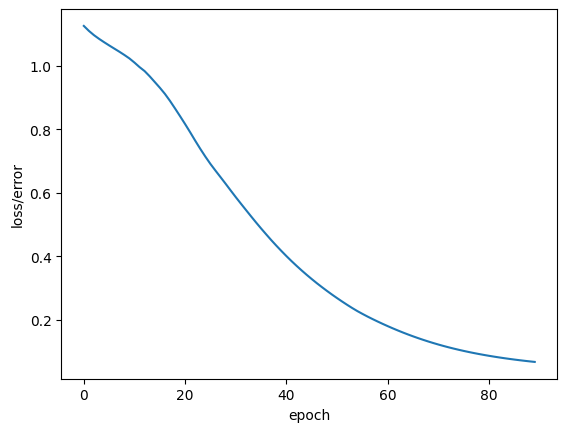

In [615]:
# Graph it ous 
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")


### Evaluate 

In [616]:
def evaluate(model, X_test, y_test, criterion):
    # Accuracy
    correct = 0
    # Turn of back propogation
    with torch.no_grad():
        for i, data in enumerate(X_test):
            # Forward with test data
            y_val = model.forward(data)
            
            # Calculate loss
            loss = criterion(y_val, y_test[i])

            # See prediction vs groundtruth
            #print(f"{i + 1} {str(y_val)} \t {y_test[i]}")

            # Correct or not
            if y_val.argmax().item() == y_test[i]:
                correct +=1

    # Accuracy
    accuracy = correct/len(X_test) * 100

    print(f"Model accuracy: {round(accuracy, 2)}%")

In [617]:
# Eval with train dataset
evaluate(model, X_train, y_train, criterion)

Model accuracy: 99.17%


In [618]:
# Eval with train dataset
evaluate(model, X_test, y_test, criterion)

Model accuracy: 96.67%


### Inference

In [619]:
# This data is from class 2
new_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [620]:
def inference(model, input):
    with torch.no_grad():
        prediction = model(new_iris).argmax().item()
        print(f"Predicted class: {prediction}")

In [621]:
inference(model, new_iris)

Predicted class: 2


### Save and load the NN model

In [622]:
# Save
torch.save(model.state_dict(), "my_weight.pt")

In [623]:
# Load
new_model = Model()
new_model.load_state_dict(torch.load("my_weight.pt"))

/tmp/ipykernel_57225/2340992812.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load("my_weight.pt"))


<All keys matched successfully>

In [624]:
# Check loaded model structure
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)